# Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [8]:
df = pd.read_csv('adult-depression-lghc-indicator-24.csv')

In [9]:
df.head()

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65


In [10]:
df.shape

(161, 8)

In [11]:
data_2013_selected = df[df['Year'] == 2013][['Year', 'Strata', 'Strata Name']]

In [12]:
print(data_2013_selected)

    Year          Strata                              Strata Name
23  2013           Total                                    Total
24  2013             Sex                                     Male
25  2013             Sex                                   Female
26  2013  Race-Ethnicity                                    White
27  2013  Race-Ethnicity                                    Black
28  2013  Race-Ethnicity                                 Hispanic
29  2013  Race-Ethnicity                   Asian/Pacific Islander
30  2013  Race-Ethnicity                                    Other
31  2013       Education                   No High School Diploma
32  2013       Education  High School Graduate or GED Certificate
33  2013       Education              Some College or Tech School
34  2013       Education            College Graduate or Post Grad
35  2013          Income                                < $20,000
36  2013          Income                        $20,000 - $34,999
37  2013  

# Check Missing values

In [19]:
df.isnull().sum()

Year                  0
Strata                0
Strata Name           0
Frequency             0
Weighted Frequency    7
Percent               0
Lower 95% CL          0
Upper 95% CL          0
dtype: int64

In [22]:
df['Weighted Frequency']  = df['Weighted Frequency'].fillna(df['Weighted Frequency'].mean())

In [24]:
df.isnull().sum()

Year                  0
Strata                0
Strata Name           0
Frequency             0
Weighted Frequency    0
Percent               0
Lower 95% CL          0
Upper 95% CL          0
dtype: int64

# Check Duplicates Values

In [27]:
df.duplicated().sum()

0

# Data Summarize

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                161 non-null    int64  
 1   Strata              161 non-null    object 
 2   Strata Name         161 non-null    object 
 3   Frequency           161 non-null    int64  
 4   Weighted Frequency  161 non-null    float64
 5   Percent             161 non-null    float64
 6   Lower 95% CL        161 non-null    float64
 7   Upper 95% CL        161 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 10.2+ KB


# Check Statistical Summary of Numerical Columns

In [33]:
df.describe()

,Year,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
count,161.00000,161.000000,1.610000e+02,161.000000,161.000000,161.000000
mean,2015.00000,429.776398,8.898917e+05,14.789627,11.955280,17.624224
std,2.00624,390.297867,6.159810e+05,4.589876,3.705456,5.890040
min,2012.00000,28.000000,9.230900e+04,3.970000,2.000000,5.340000
25%,2013.00000,186.000000,4.700770e+05,11.850000,9.650000,13.870000
50%,2015.00000,314.000000,7.496150e+05,14.520000,11.550000,16.930000
75%,2017.00000,511.000000,1.069791e+06,17.190000,14.600000,20.050000
max,2018.00000,1964.000000,3.301418e+06,33.090000,24.600000,44.950000


# EDA

In [36]:
df.head()

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,8.898917e+05,11.74,11.11,12.37
1,2012,Sex,Male,561,1.116664e+06,8.12,7.32,8.92
2,2012,Sex,Female,1359,2.163108e+06,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1.806371e+06,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,2.220220e+05,13.54,10.44,16.65


Strata
Income            42
Race-Ethnicity    35
Age               35
Education         28
Sex               14
Total              7
Name: count, dtype: int64


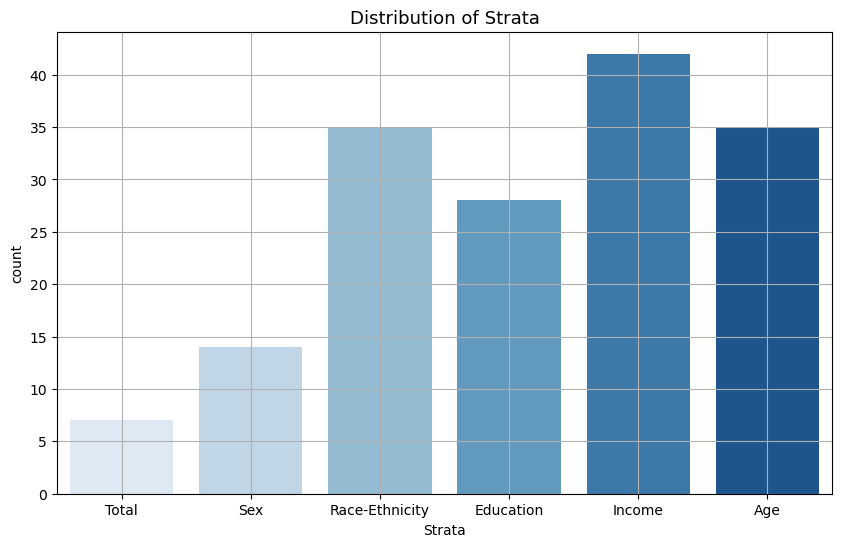

In [40]:
print(df['Strata'].value_counts())

plt.figure(figsize=(10,6))
plt.title('Distribution of Strata', fontsize=13)
sns.countplot(x='Strata', hue='Strata', data=df, palette='Blues', legend=False)
plt.grid()
plt.show()

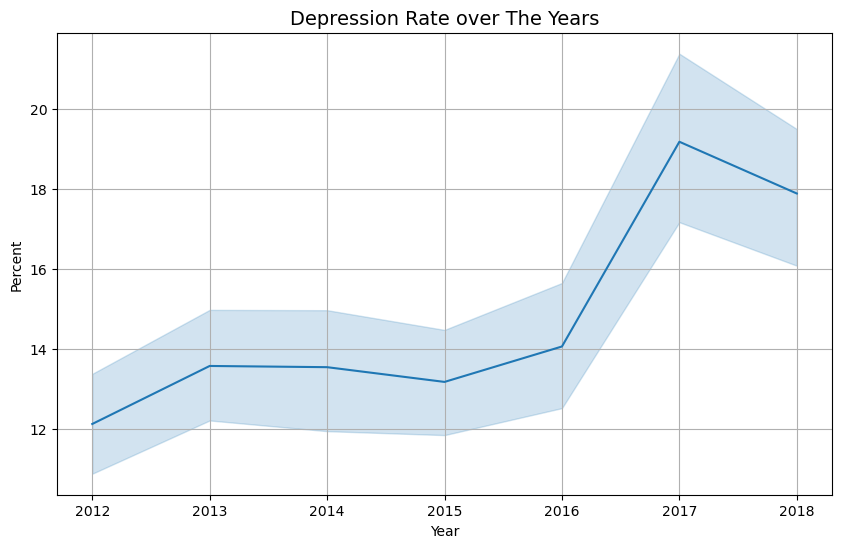

In [42]:
plt.figure(figsize=(10,6))
plt.title('Depression Rate over The Years',fontsize=14)
sns.lineplot(x=df['Year'], y=df['Percent'])
plt.grid()
plt.show()

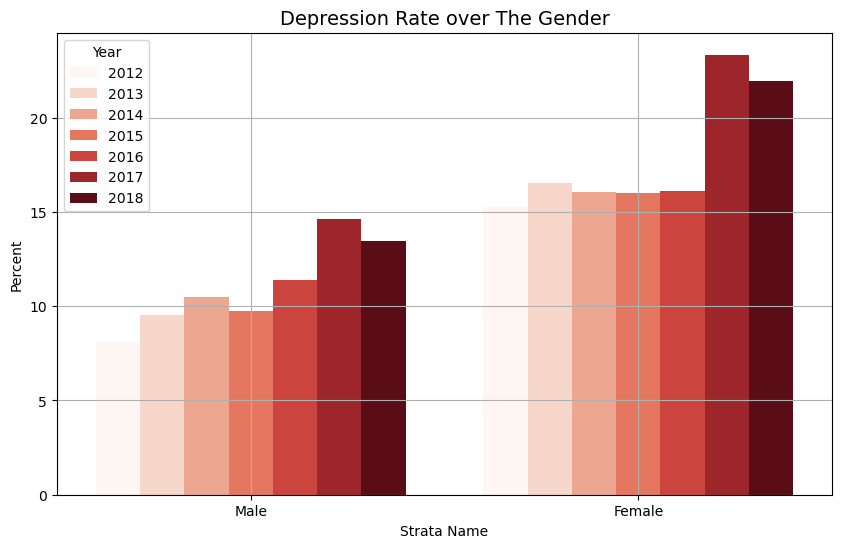

In [44]:
plt.figure(figsize=(10,6))
plt.title('Depression Rate over The Gender',fontsize=14)
sns.barplot(data=df[df['Strata']== 'Sex'], x='Strata Name', y='Percent', hue='Year', palette='Reds')
plt.grid()
plt.show()

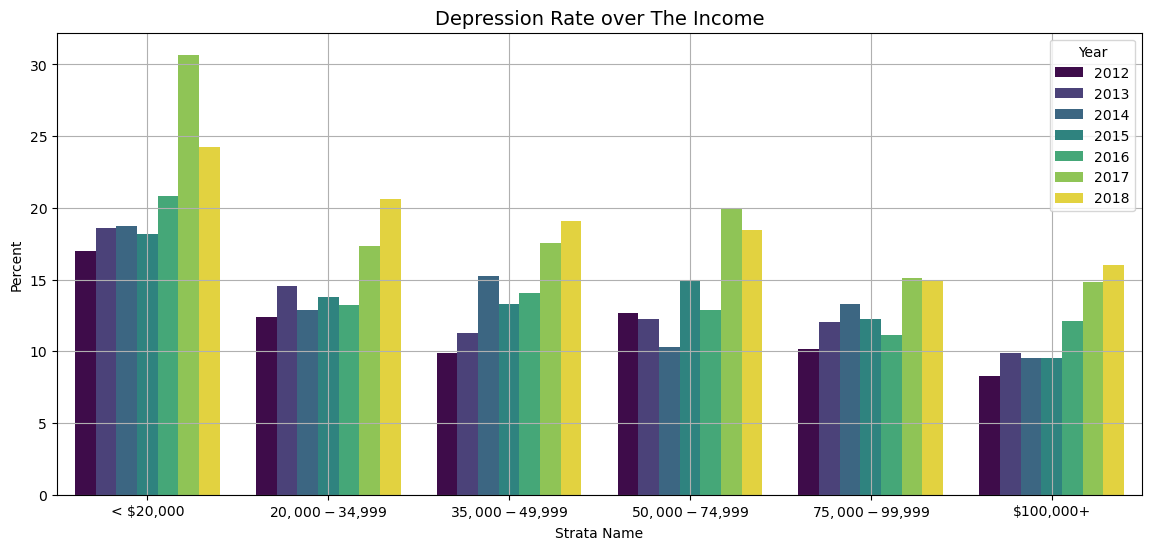

In [46]:
plt.figure(figsize=(14,6))
plt.title('Depression Rate over The Income',fontsize=14)
sns.barplot(data=df[df['Strata']== 'Income'], x='Strata Name', y='Percent', hue='Year', palette='viridis')
plt.grid()
plt.show()

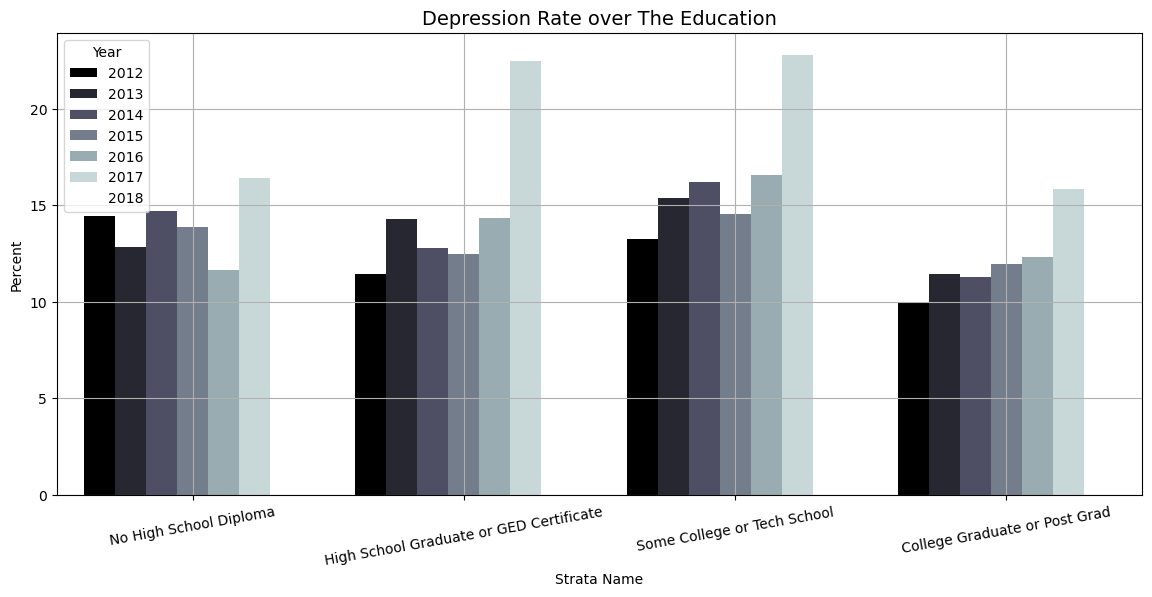

In [48]:
plt.figure(figsize=(14,6))
plt.title('Depression Rate over The Education',fontsize=14)
sns.barplot(data=df[df['Strata']== 'Education'], x='Strata Name', y='Percent', hue='Year', palette='bone')
plt.grid()
plt.xticks(rotation=10)
plt.show()

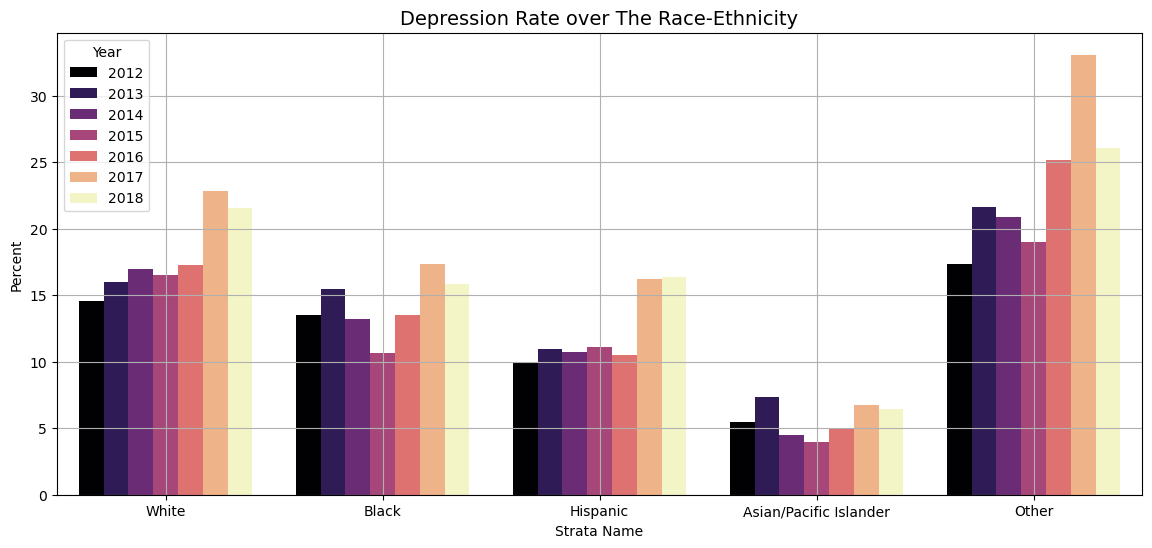

In [50]:
plt.figure(figsize=(14,6))
plt.title('Depression Rate over The Race-Ethnicity',fontsize=14)
sns.barplot(data=df[df['Strata']== 'Race-Ethnicity'], x='Strata Name', y='Percent', hue='Year', palette='magma')
plt.grid()
plt.show()

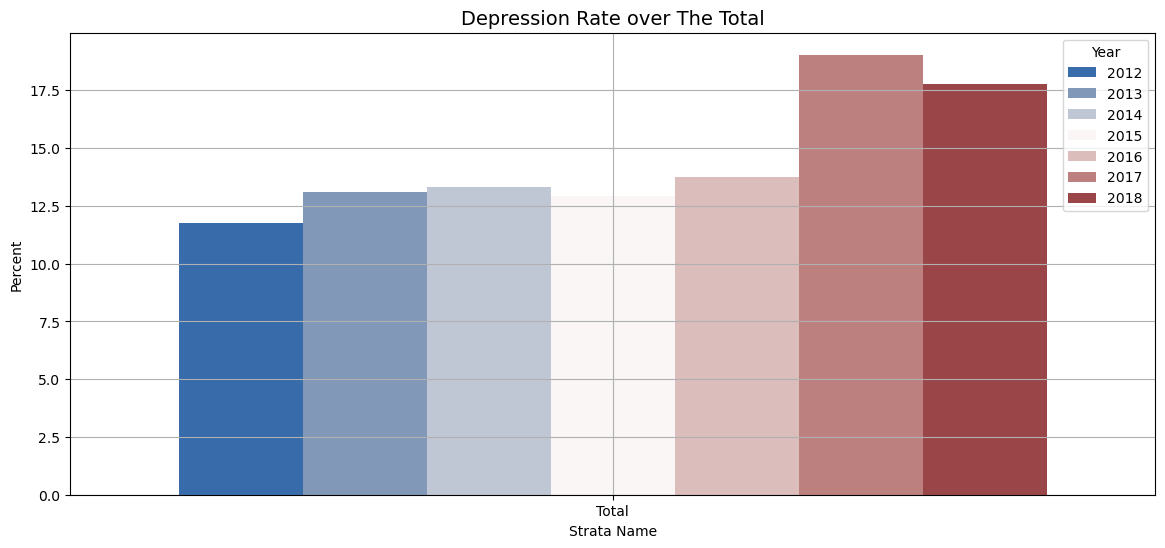

In [52]:
plt.figure(figsize=(14,6))
plt.title('Depression Rate over The Total',fontsize=14)
sns.barplot(data=df[df['Strata']== 'Total'], x='Strata Name', y='Percent', hue='Year', palette='vlag')
plt.grid()
plt.show()

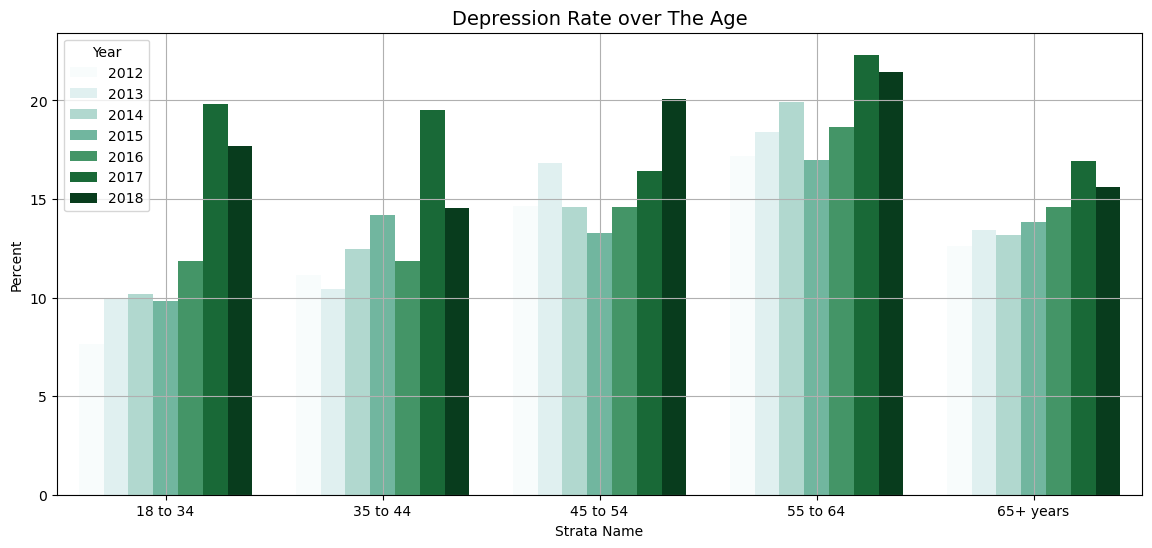

In [54]:
plt.figure(figsize=(14,6))
plt.title('Depression Rate over The Age',fontsize=14)
sns.barplot(data=df[df['Strata']== 'Age'], x='Strata Name', y='Percent', hue='Year', palette='BuGn')
plt.grid()
plt.show()

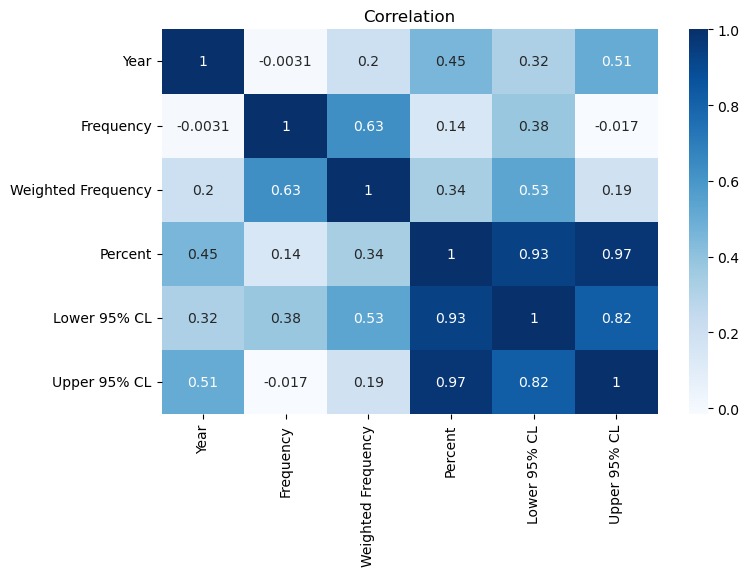

In [56]:
plt.figure(figsize=(8,5))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation')
plt.show()

# Independent and Target Variables

In [59]:
df.drop(columns=['Strata', 'Strata Name'], axis=1, inplace=True, errors='ignore')


X  = df.drop(columns='Percent')
y = df['Percent']

# Spliting Data into Training and Testing Sets

In [62]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

In [64]:
print(f"X_train Data: {X_train.shape}")
print(f"y_train Data: {y_train.shape}")
print(f"X_test Data: {X_test.shape}")
print(f"y_test Data: {y_test.shape}")

X_train Data: (128, 5)
y_train Data: (128,)
X_test Data: (33, 5)
y_test Data: (33,)


# Scale Data

In [69]:
scaler =  StandardScaler()
scaler.fit(X_train, X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Building

In [72]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred1 = lr.predict(X_test_scaled)

print("R2 Score: ", r2_score(y_test, y_pred1))
print("Mean_Squared_Error: ", mean_squared_error(y_test,y_pred1))

R2 Score:  0.9999994392499907
Mean_Squared_Error:  1.161813351271877e-05


In [74]:
ridge =  Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred2 = ridge.predict(X_test_scaled)

print("R2 Score: ", r2_score(y_test,y_pred2))
print("Mean_Squared_Error: ", mean_squared_error(y_test,y_pred2))

R2 Score:  0.999938826448441
Mean_Squared_Error:  0.0012674498040235356


In [76]:
lasso =  Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred3 = lasso.predict(X_test_scaled)

print("R2 Score: ", r2_score(y_test,y_pred3))
print("Mean_Squared_Error: ", mean_squared_error(y_test,y_pred3))

R2 Score:  0.9422987566970591
Mean_Squared_Error:  1.1955073336842643


In [78]:
rf =  RandomForestRegressor(n_estimators=500)
rf.fit(X_train_scaled,y_train)
y_pred4 = rf.predict(X_test_scaled)

print("R2 Score: ", r2_score(y_test,y_pred4))
print("Mean_Squared_Error: ", mean_squared_error(y_test,y_pred4))

R2 Score:  0.982411876275135
Mean_Squared_Error:  0.36440689481210076


In [80]:
tree =  DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred5 = tree.predict(X_test)

print("R2 Score: ", r2_score(y_test,y_pred5))
print("Mean_Squared_Error: ", mean_squared_error(y_test,y_pred5))

R2 Score:  0.8944679890420832
Mean_Squared_Error:  2.186509090909091


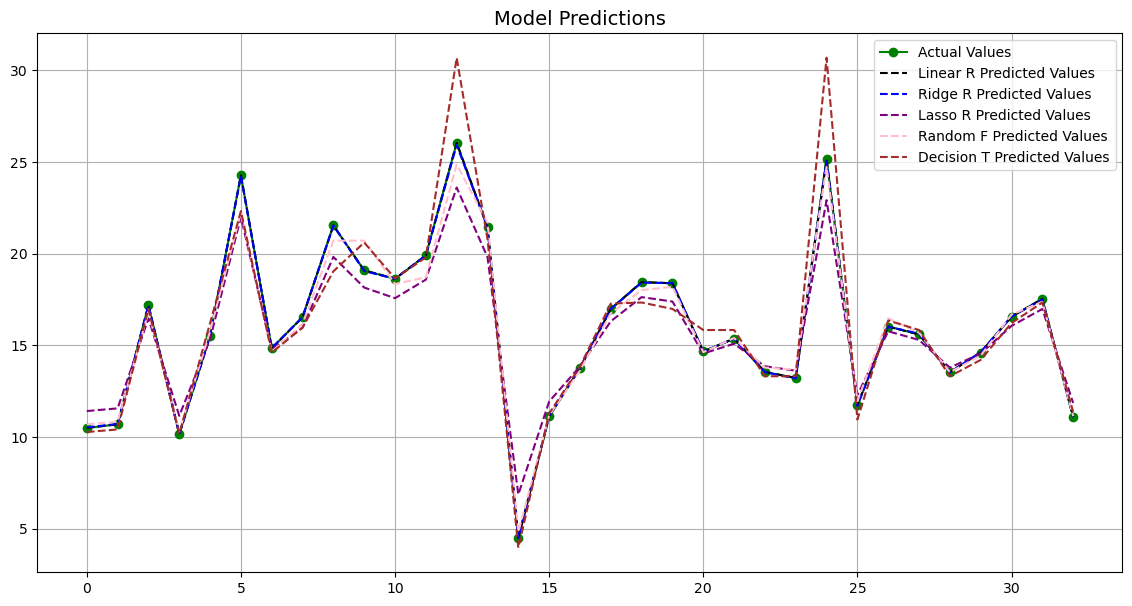

In [82]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Values', marker='o', color='green')
plt.plot(y_pred1, label='Linear R Predicted Values', color='black', linestyle='--')
plt.plot(y_pred2, label='Ridge R Predicted Values', color='blue', linestyle='--')
plt.plot(y_pred3, label='Lasso R Predicted Values', color='purple', linestyle='--')
plt.plot(y_pred4, label='Random F Predicted Values', color='pink', linestyle='--')
plt.plot(y_pred5, label='Decision T Predicted Values', color='brown', linestyle='--')



plt.title('Model Predictions',fontsize=14)
plt.legend()
plt.grid(True)
plt.show()